In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
from pandas import DataFrame
from typing import cast
import matplotlib.pyplot as plt

from stochastic_volatility_models.src.core.underlying import Underlying
from stochastic_volatility_models.src.core.volatility_surface import VolatilitySurface
from stochastic_volatility_models.src.core.pricing_models import PricingModel
from stochastic_volatility_models.src.utils.options.strikes import find_closest_strikes
from stochastic_volatility_models.src.utils.options.expiry import time_to_expiry
from stochastic_volatility_models.src.data.rates import get_risk_free_interest_rate
from stochastic_volatility_models.src.data.dividends import get_dividend_yield
from stochastic_volatility_models.visualisations.volatility_surface import plot_volatility_surface
from stochastic_volatility_models.src.utils.options.strikes import moneyness

2024-08-01 16:07:10.876 | INFO     | stochastic_volatility_models.config:initialise:30 - Loaded module `stochastic_volatility_models` from project directory path `/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/Project/modules`


In [2]:
ticker = "SPX"
spx = Underlying(ticker)
pricing_model = PricingModel("Black-Scholes")
time = np.datetime64("2022-03-03")

In [3]:
expiries = np.array(
	["2022-03-04", "2022-03-09", "2022-03-11", "2022-03-18", "2022-03-23", "2022-03-25", "2022-03-30", "2022-03-31", "2022-04-01", "2022-04-08", "2022-04-14", "2022-04-22", "2022-04-29", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31"], dtype=np.datetime64
)

strikes = np.array(
	[
		2200,
		2400,
		2600,
		2800,
		3000,
		3200,
		3400,
		3500,
		3600,
		3700,
		3800,
		3850,
		3900,
		3950,
		3975,
		4000,
		4025,
		4040,
		4050,
		4060,
		4070,
		4075,
		4080,
		4090,
		4100,
		4110,
		4120,
		4125,
		4130,
		4140,
		4150,
		4160,
		4170,
		4175,
		4180,
		4190,
		4200,
		4210,
		4220,
		4225,
		4230,
		4240,
		4250,
		4260,
		4270,
		4275,
		4280,
		4290,
		4300,
		4310,
		4320,
		4325,
		4330,
		4340,
		4350,
		4360,
		4370,
		4375,
		4380,
		4390,
		4400,
		4410,
		4420,
		4425,
		4430,
		4440,
		4450,
		4460,
		4470,
		4475,
		4480,
		4490,
		4500,
		4510,
		4525,
		4550,
		4600,
		4650,
		4700,
		4800,
		5000,
		5200,
		5400,
	]
)
# strikes = np.array([4100, 4200,4250, 4260, 4270, 4280, 4290, 4300, 4310, 4320, 4340, 4350, 4360, 4370, 4380, 4400, 4500])
spx_vs = VolatilitySurface(
	underlying=spx,
	expiries=expiries,
	strikes=strikes,
	monthly=False,
)

In [4]:
volatility_surface = spx_vs
surface = volatility_surface.surface_quantities(
	time=time,
	quantity_method="empirical_pricing_implied_volatility",
	price_types=["Mid"],
	out_the_money=True,
	pricing_model=PricingModel(),
)[0]

T: 2022-03-04
r: 0.004243063047887182
q: 0.4888974062314018


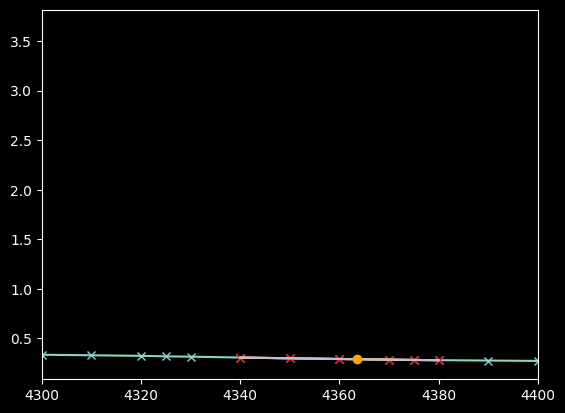

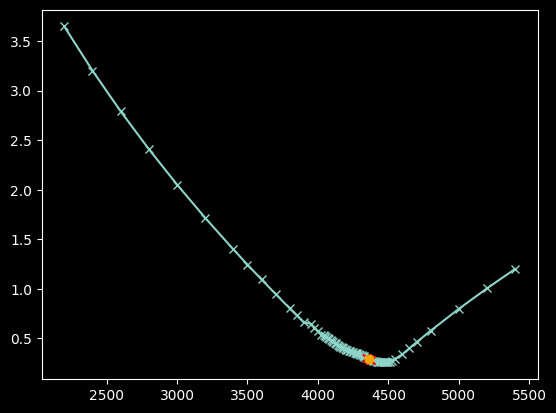

T: 2022-03-09
r: 0.004351115078911429
q: 0.09769910870280138


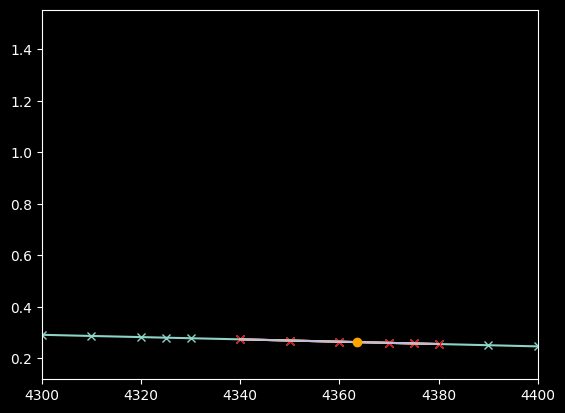

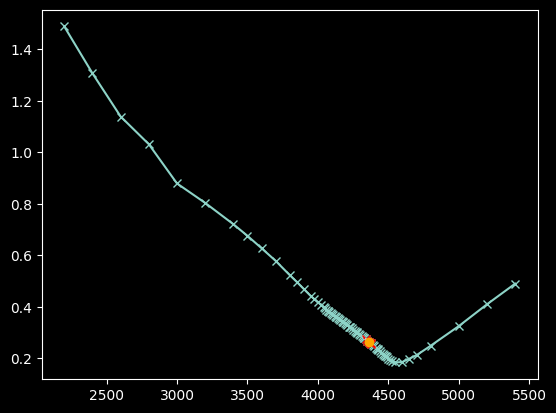

T: 2022-03-11
r: 0.0043943598063137055
q: 0.08121553678754773


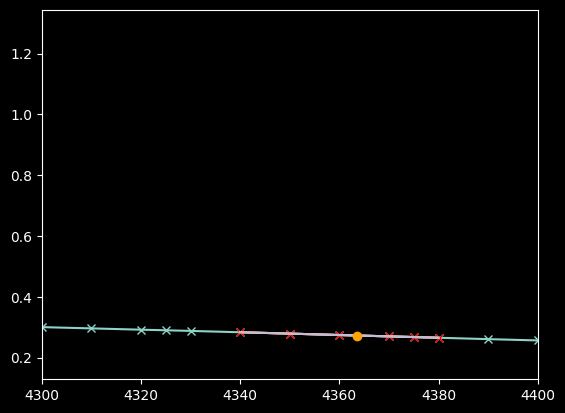

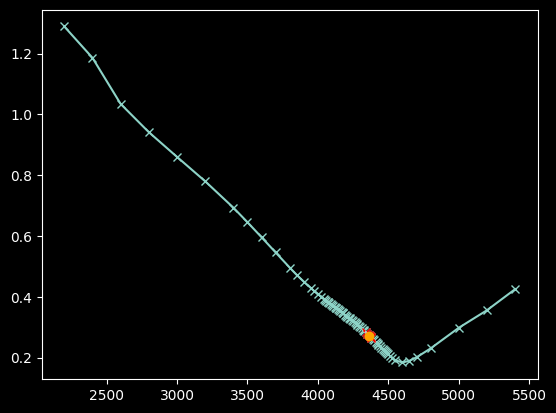

T: 2022-03-18
r: 0.004545723526719447
q: 0.05390346285872464


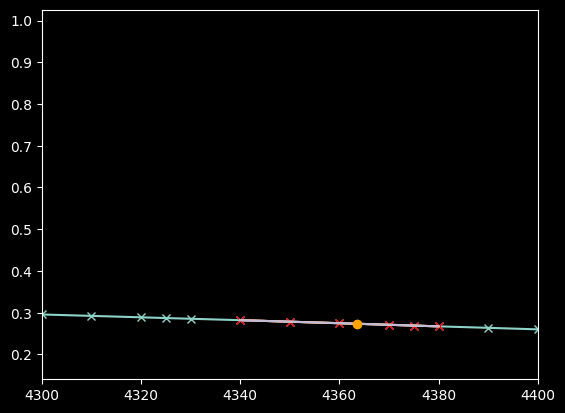

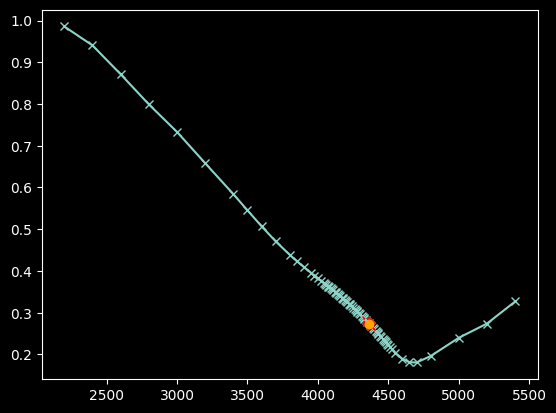

T: 2022-03-23
r: 0.0046537516427511165
q: 0.04251343258966736


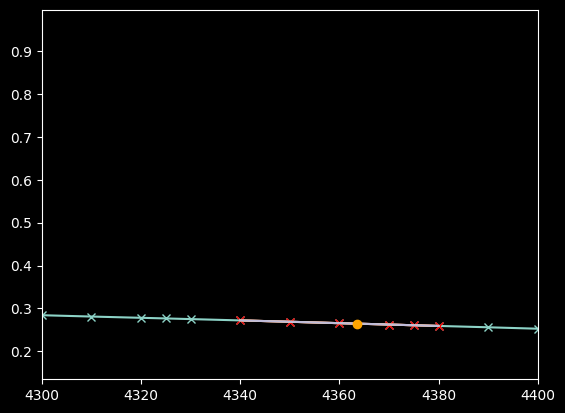

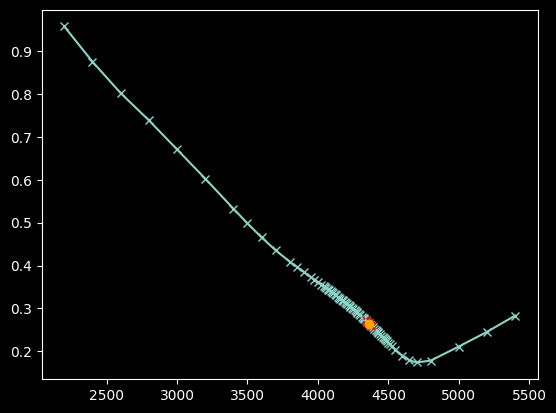

T: 2022-03-25
r: 0.004696919842177142
q: 0.040449910179584124


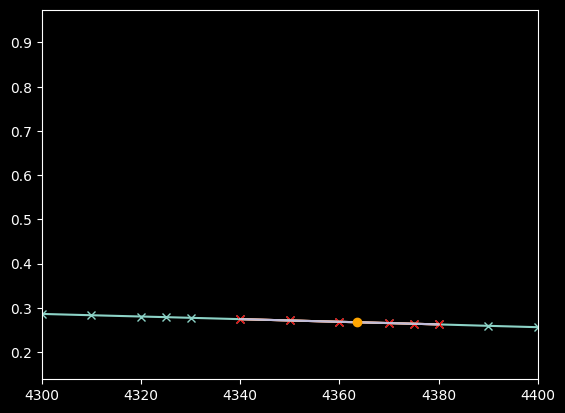

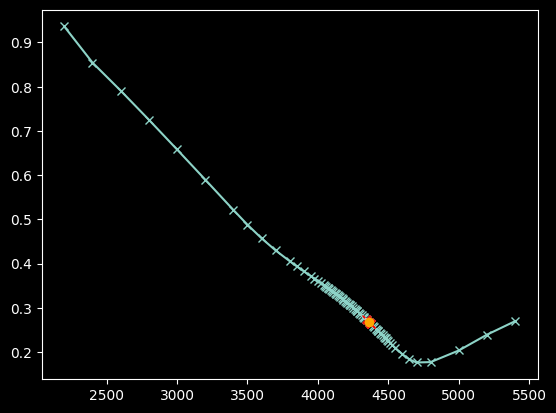

T: 2022-03-30
r: 0.004804684893290452
q: 0.034870996866688674


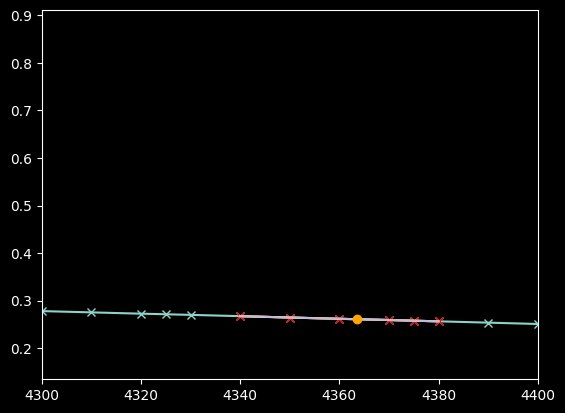

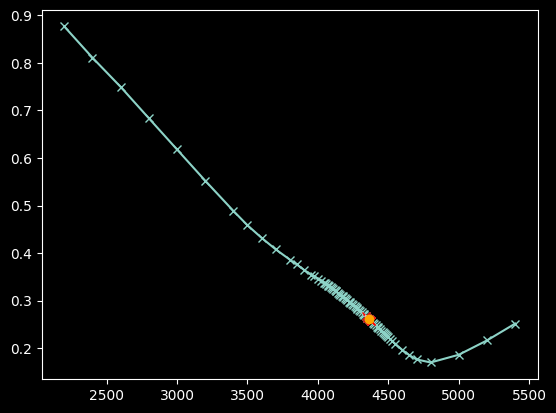

T: 2022-03-31
r: 0.0048262057890945086
q: 0.03441827402877857


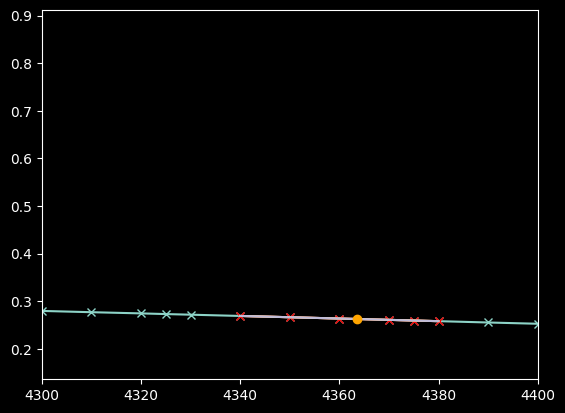

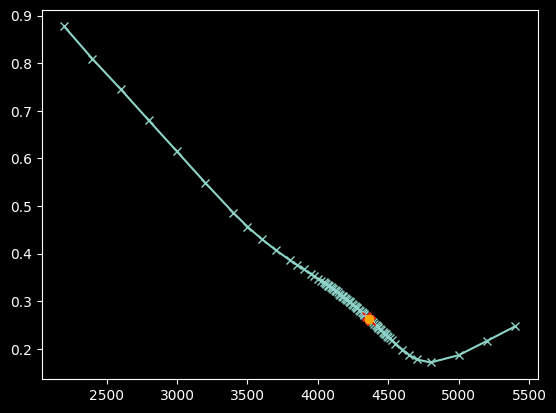

T: 2022-04-01
r: 0.004847714385759525
q: 0.03298605049218409


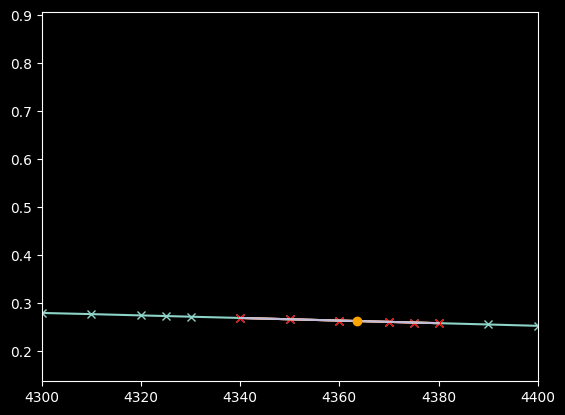

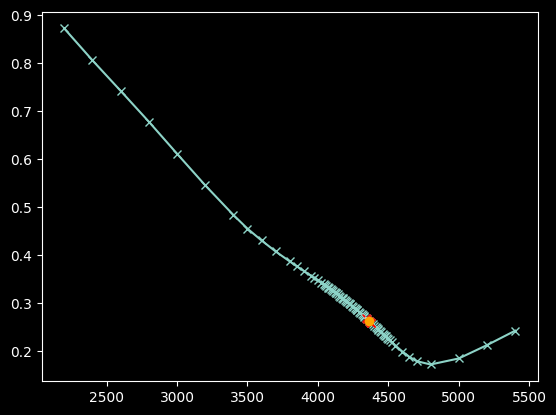

T: 2022-04-08
r: 0.004997900930509644
q: 0.030458268954142262


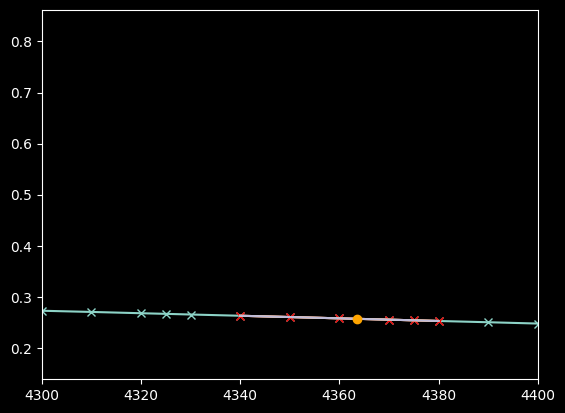

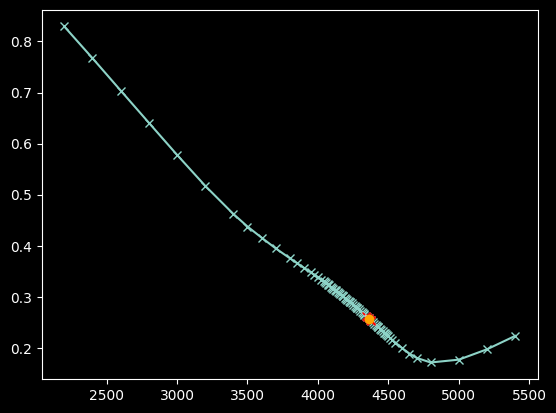

T: 2022-04-14
r: 0.005126121145611073
q: 0.027256304869640167


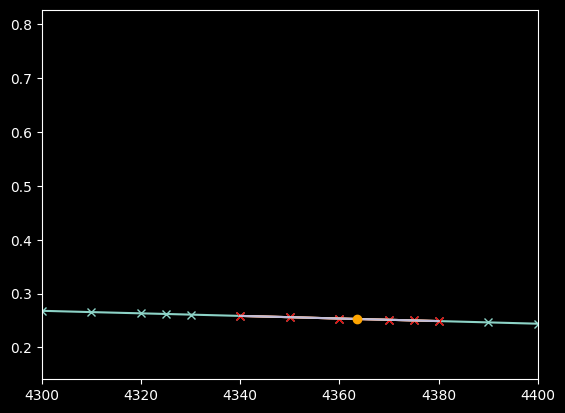

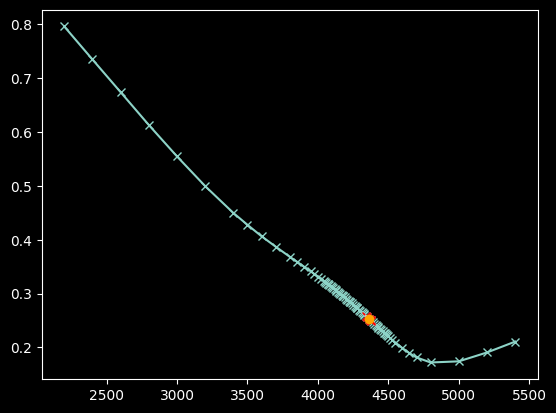

T: 2022-04-22
r: 0.0052963859371048284
q: 0.02396644601967401


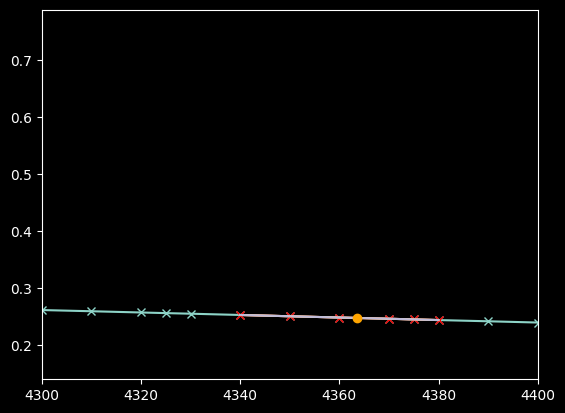

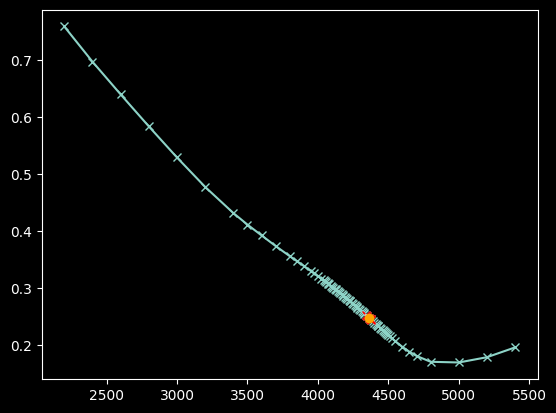

T: 2022-04-29
r: 0.005444751757585346
q: 0.022124173243869543


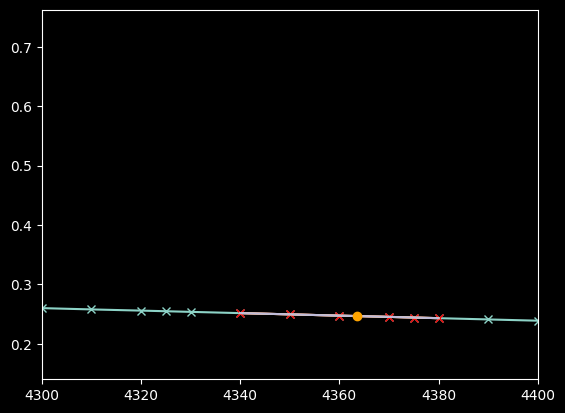

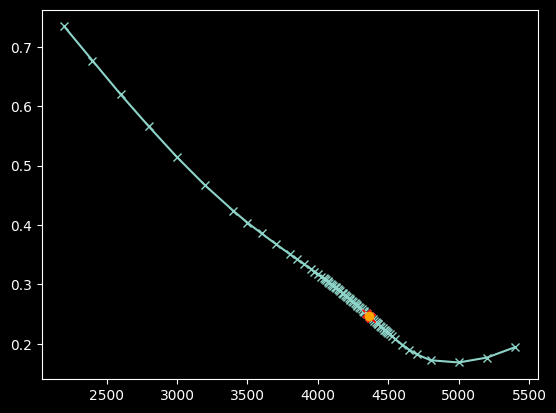

T: 2022-05-20
r: 0.005886622268963968
q: 0.021150300374573744


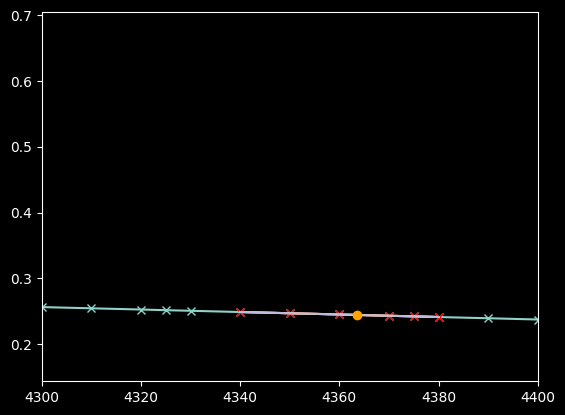

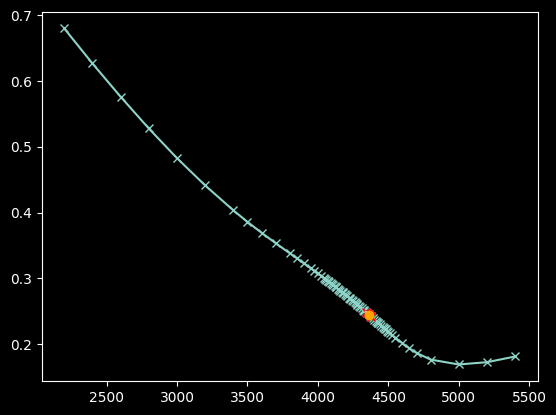

T: 2022-05-31
r: 0.006116113817309536
q: 0.02015782849890136


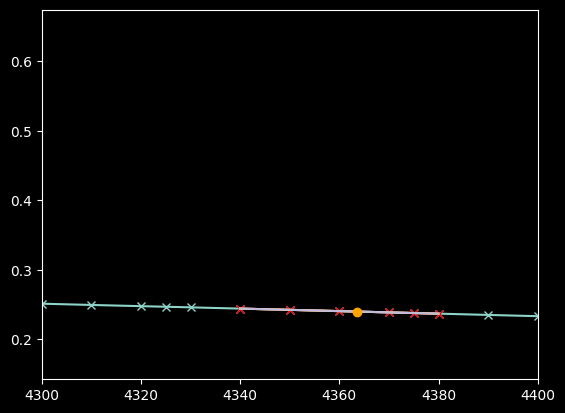

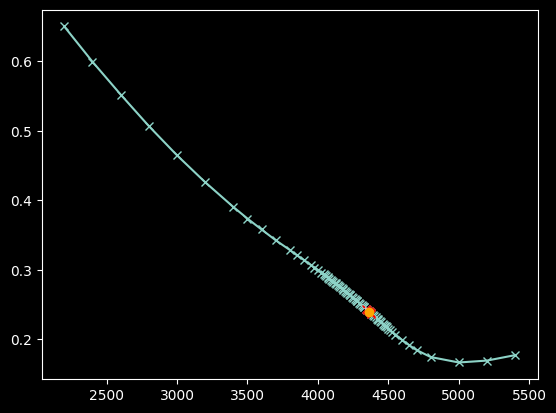

T: 2022-06-17
r: 0.006468026733666774
q: 0.01961173622304795


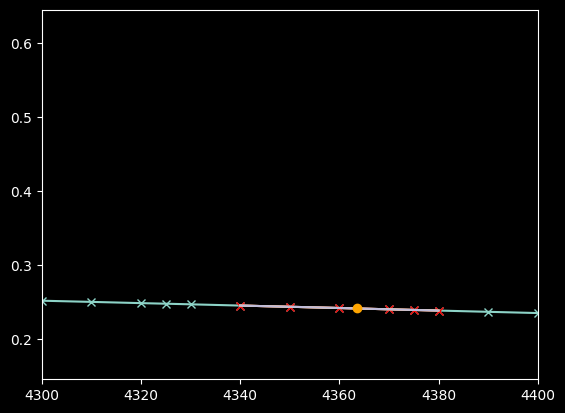

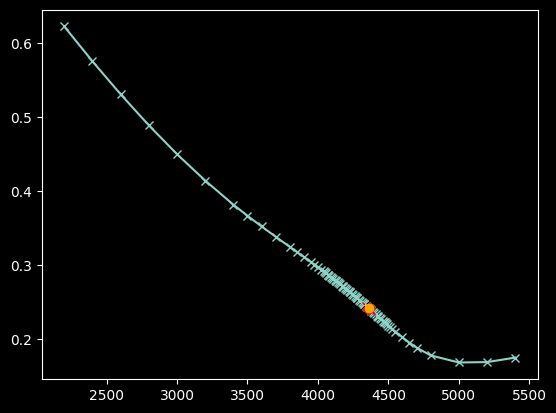

T: 2022-06-30
r: 0.006734869404451865
q: 0.018376056853376007


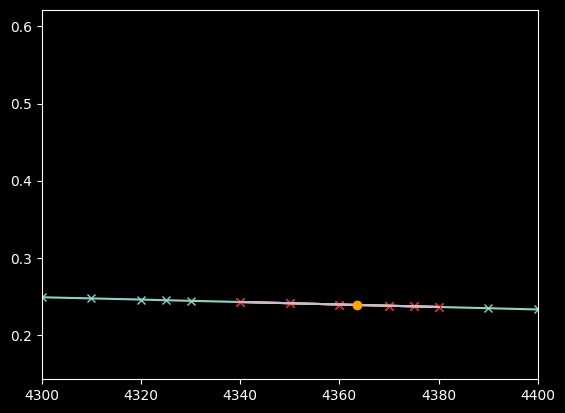

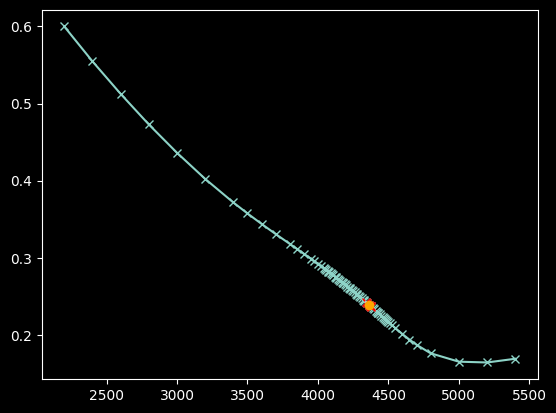

T: 2022-07-15
r: 0.0070403274038247565
q: 0.017154811048450954


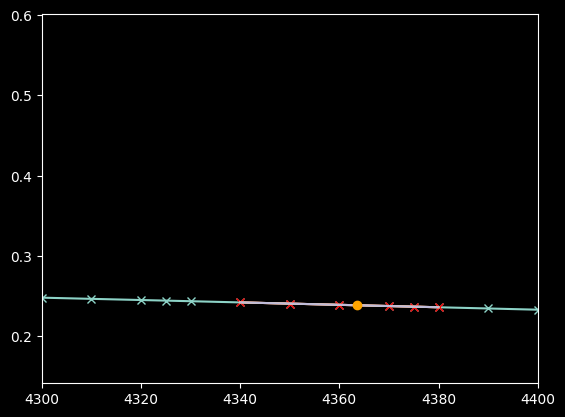

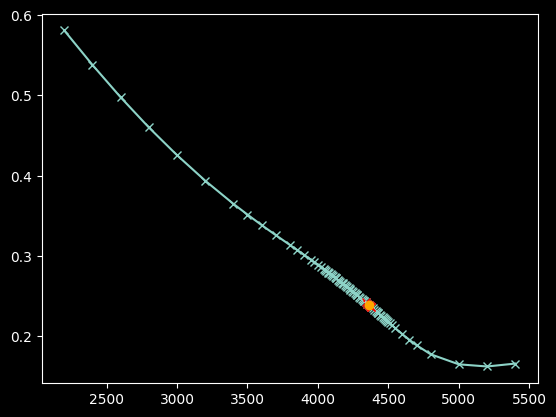

T: 2022-07-29
r: 0.00732305356457291
q: 0.016056829076663198


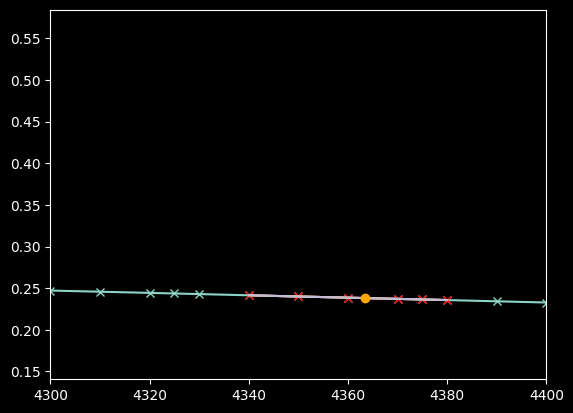

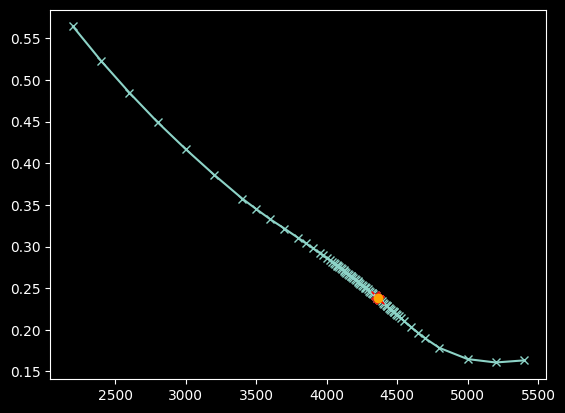

T: 2022-08-31
r: 0.007980361515703907
q: 0.015592943938069313


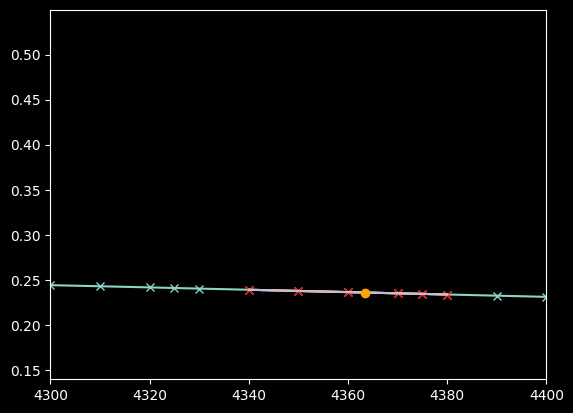

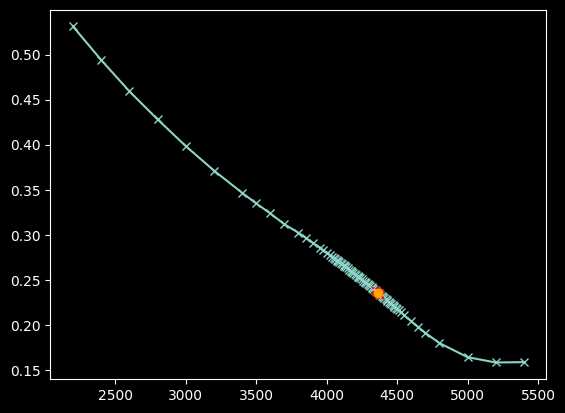

In [5]:
surface = volatility_surface.surface_quantities(
	time=time,
	quantity_method="empirical_pricing_implied_volatility",
	price_types=["Mid"],
	out_the_money=True,
	pricing_model=PricingModel("Black-Scholes-Merton"),
)[0]
for i, expiry in enumerate(volatility_surface.expiries):
	print(f"T: {expiry}")
	t2x = time_to_expiry(time, volatility_surface.expiries)
	print(f"r: {get_risk_free_interest_rate(time, t2x)[i]}")
	print(f"q: {get_dividend_yield(volatility_surface.underlying, time, volatility_surface.expiries, False)[i]}")
	indices = find_closest_strikes(
		strikes=volatility_surface.strikes,
		spot=volatility_surface.underlying.price(time=time),
	)
	# print(indices)
	cs = CubicSpline(
		x=indices,
		y=cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values,
		bc_type="natural",
	)
	x = np.linspace(indices.min(), indices.max(), 100)
	s, i = np.polyfit(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].to_numpy(), 1)

	plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
	plt.plot(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values, linestyle=None, marker="x", color="red")
	plt.plot(x, s * x + i)
	plt.plot(x, cs(x))
	plt.plot((spot := volatility_surface.underlying.price(time=time)), cs(spot), color="orange", marker="o")
	plt.gca().set_xlim(4300, 4400)
	# plt.gca().set_ylim(0.22, 0.34)
	plt.show()

	plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
	plt.plot(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values, linestyle=None, marker="x", color="red")
	plt.plot(x, s * x + i)
	plt.plot(x, cs(x))
	plt.plot((spot := volatility_surface.underlying.price(time=time)), cs(spot), color="orange", marker="o")
	plt.show()

In [6]:
print(f"r: {get_risk_free_interest_rate(time, t2x)}")
print(f"q: {get_dividend_yield(volatility_surface.underlying, time, volatility_surface.expiries, False)}")

r: [0.00424306 0.00435112 0.00439436 0.00454572 0.00465375 0.00469692
 0.00480468 0.00482621 0.00484771 0.0049979  0.00512612 0.00529639
 0.00544475 0.00588662 0.00611611 0.00646803 0.00673487 0.00704033
 0.00732305 0.00798036]
q: [0.48889741 0.09769911 0.08121554 0.05390346 0.04251343 0.04044991
 0.034871   0.03441827 0.03298605 0.03045827 0.0272563  0.02396645
 0.02212417 0.0211503  0.02015783 0.01961174 0.01837606 0.01715481
 0.01605683 0.01559294]


In [7]:
fig = plot_volatility_surface(
	time=time,
	volatility_surface=spx_vs,
	quantity_method="empirical_pricing_implied_volatility",
	pricing_model=PricingModel("Black-Scholes-Merton"),
	# plot_parameters={"moneyness": False, "time_to_expiry": False, "log_moneyness": False, "mid_price": True},
)
fig.show()

In [8]:
fig = plot_volatility_surface(
	time=time,
	volatility_surface=spx_vs,
	quantity_method="empirical_pricing_implied_volatility",
	pricing_model=PricingModel("Black-76"),
	# plot_parameters={"moneyness": False, "time_to_expiry": False, "log_moneyness": False, "mid_price": True},
)
fig.show()

In [9]:
pricing_model = PricingModel()
volatility_surface = spx_vs

surfaces = [
	volatility_surface.surface_quantities(
		time=time,
		quantity_method="empirical_pricing_implied_volatility",
		price_types=["Mid"],
		out_the_money=True,
		pricing_model=pricing_model,
	)[0],
]

atm_skews = [
	DataFrame(
		[
			np.polyfit(
				x=moneyness(volatility_surface.underlying, indices, time, log=True),
				y=cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].to_numpy(),
				deg=1,
			)[0]
			for expiry in volatility_surface.expiries
			if (
				indices := find_closest_strikes(
					strikes=volatility_surface.strikes,
					spot=volatility_surface.underlying.price(time=time),
				)
			).any()
		],
		index=[expiry for expiry in volatility_surface.expiries],
		columns=["Skew"],
	)
	for surface in surfaces
]
print(indices)
print(spx_vs.underlying.price(time))
print(np.log(4363.49 / 4340))
print(moneyness(volatility_surface.underlying, indices, time, log=True))
atm_skews[0]

[4340 4350 4360 4370 4375 4380]
4363.49
0.005397847768005915
[ 0.00539785  0.00309635  0.00080014 -0.00149081 -0.00263432 -0.00377653]


,Skew
2022-03-04,2.930011
2022-03-09,1.985475
2022-03-11,1.970027
2022-03-18,1.617387
2022-03-23,1.411558
2022-03-25,1.294187
2022-03-30,1.176584
2022-03-31,1.198201
2022-04-01,1.185227
2022-04-08,1.116917
